In [1]:
''' Import Modules '''

from collections import Counter, defaultdict
import numpy as np 
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import cv2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
''' Display Training Data File Sizes '''

trainingData = 'train_v2.csv'
trainJPG = 'train-jpg'
print(trainingData.ljust(30) + str(round(os.path.getsize(trainingData) / 1000000, 2)) + 'MB')
size = [os.path.getsize(trainJPG + '/'+ x)/1000000 for x in os.listdir(trainJPG)]
print(trainJPG.ljust(30) + str(round(sum(size), 2)) + 'MB' + ' ({} files)'.format(len(size)))

' Display Training Data File Sizes '

train_v2.csv                  1.43MB
train-jpg                     634.68MB (40479 files)


'Variable Definitions and Attribute Correlations'

            *Original Training Meta-Data .CSV*

   image_name                                         tags
0     train_0                                 haze primary
1     train_1              agriculture clear primary water
2     train_2                                clear primary
3     train_3                                clear primary
4     train_4    agriculture clear habitation primary road
5     train_5                           haze primary water
6     train_6  agriculture clear cultivation primary water
7     train_7                                 haze primary
8     train_8        agriculture clear cultivation primary
9     train_9   agriculture clear cultivation primary road
10   train_10   agriculture clear primary slash_burn water
11   train_11                          clear primary water
12   train_12                                       cloudy
13   train_13                                clear primary


(0.0, 1.0, 0.0, 1.0)

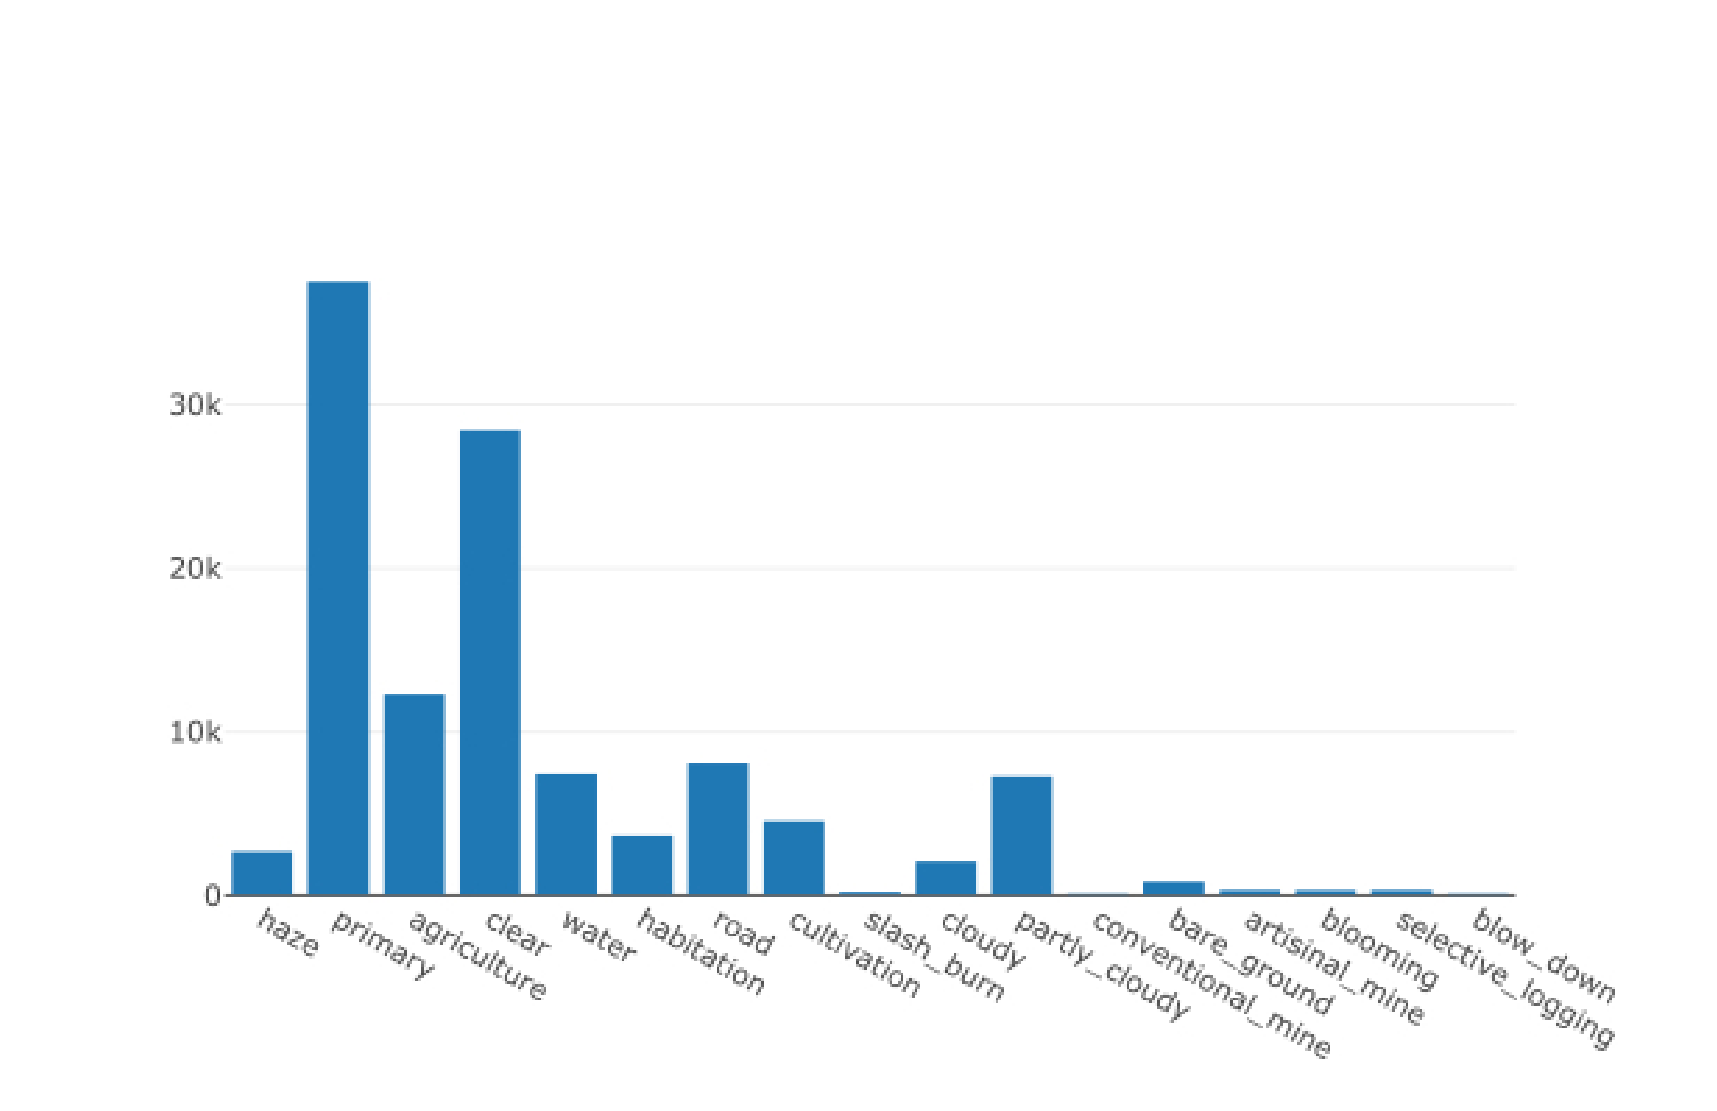

In [7]:
'''Variable Definitions and Attribute Correlations'''

trainingData = 'train_v2.csv'  #file containing initial training data
file = open(trainingData, 'r') #open trainingData file with 'read' access
origData = pd.read_csv(file)
origData = pd.DataFrame(origData, columns=['image_name','tags'])
file.close()

#ChiSquare Correlation Feature Lists
plantLife = ['blooming', 'blow_down']
cloud_cover = ['haze', 'cloudy', 'partly_cloudy']
clear =  'clear' #referring to weather
#forest = ['primary', 'bare_ground', 'water']
#industrial = ['habitation', 'road', 'conventional_mine', 'artisinal_mine']

#Print out meta-data file head
print('            *Original Training Meta-Data .CSV*\n')
print(origData.head(14))


#------------------------------------------------------------------
# Vizualize Original Data With Tags
tags = origData['tags'].apply(lambda x: x.split(' '))
counts = defaultdict(int)
for tag in tags:
    for x in tag:
        counts[x] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
graph = py.iplot(data, filename='train-label-dist');
plt.show(graph)
 
ax = plt.subplots(figsize=(30, 30))
img = cv2.imread('plot_images/tags.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

'Conduct Data Reduction and Preprocessing Using ChiSquared'

            *Data After Preprocessing (ChiSquare)*

   image_name                                   tags
0     train_0                         primary cloudy
1     train_1              agriculture primary water
2     train_2                                primary
3     train_3                                primary
4     train_4    agriculture habitation primary road
5     train_5                   primary water cloudy
6     train_6  agriculture cultivation primary water
7     train_7                         primary cloudy
8     train_8        agriculture cultivation primary
9     train_9   agriculture cultivation primary road
10   train_10   agriculture primary slash_burn water
11   train_11                          primary water
12   train_12                                 cloudy
13   train_13                                primary


' Clean Reduced Data to Ensure Believability '

' Visualize Processed Data With Tags '

(0.0, 1.0, 0.0, 1.0)

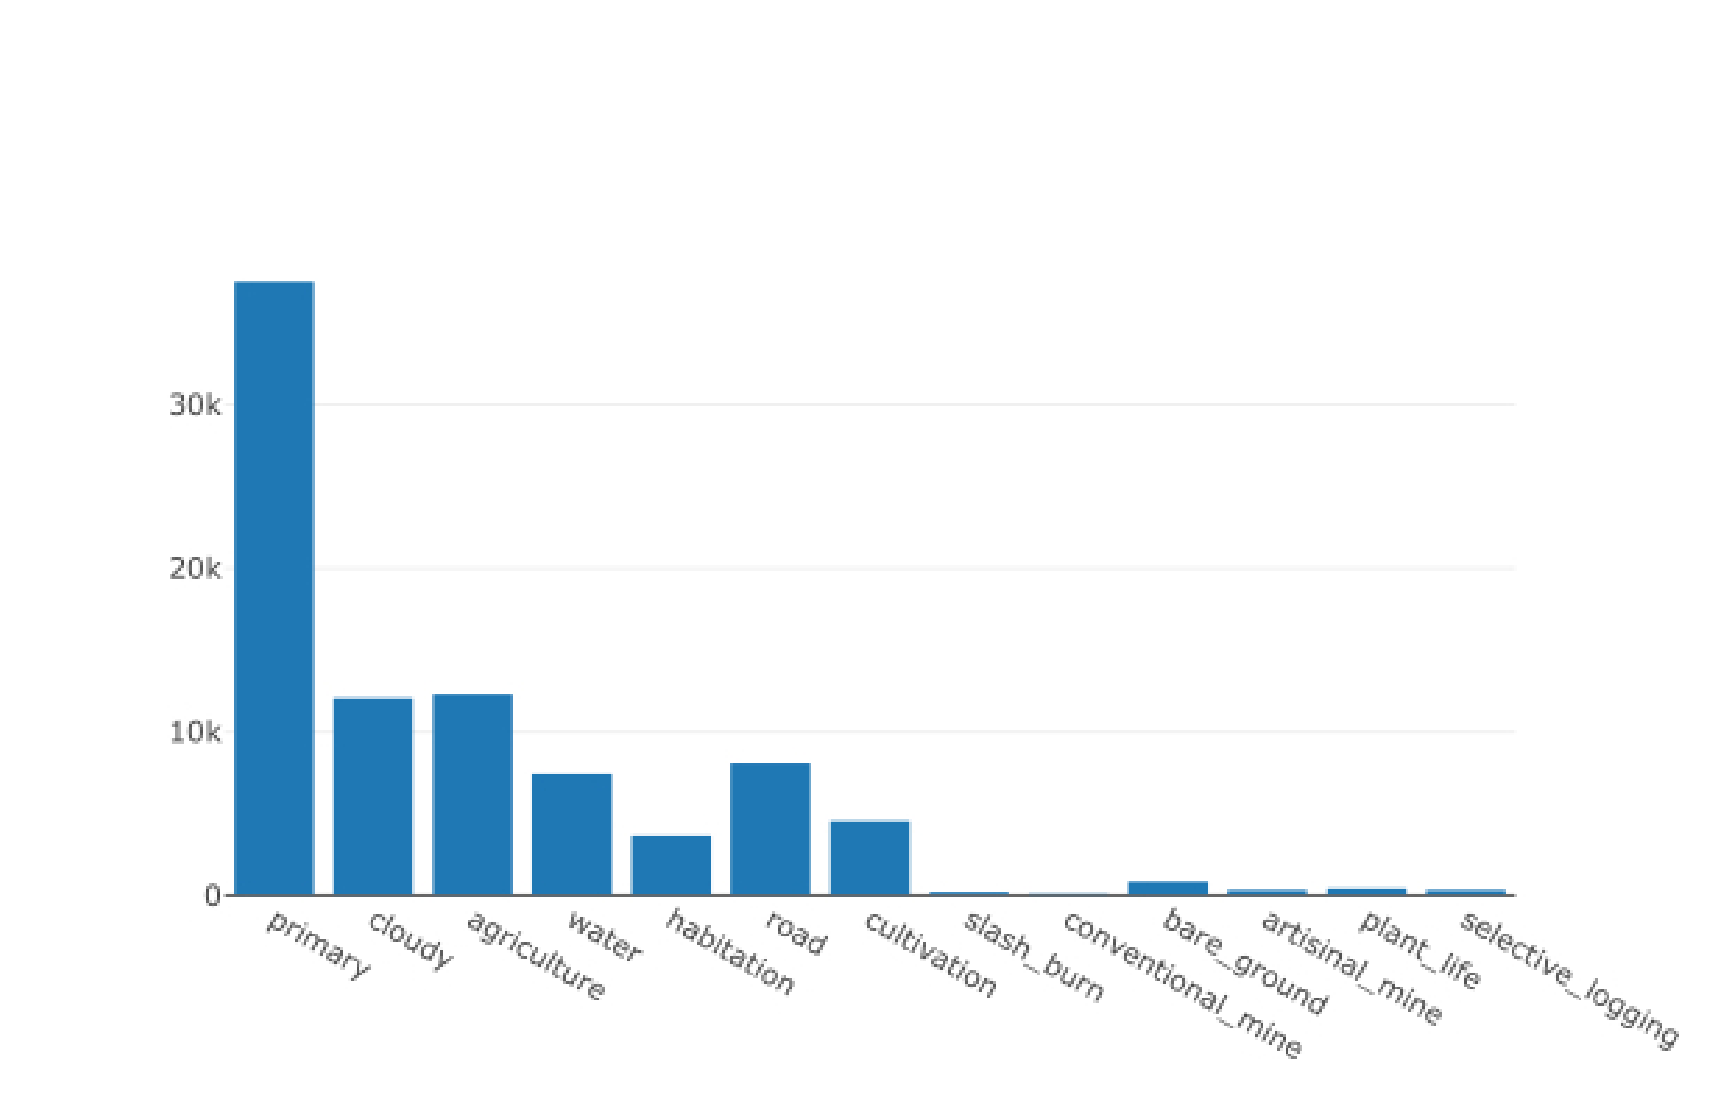

In [8]:
'''Conduct Data Reduction and Preprocessing Using ChiSquared'''

procTags = list() #list to store data after preprocessing

for tag in origData.tags:
    tmp = tag.split(' ')
    tmp = list(tmp)
    #print(tmp)
    while clear in tmp : tmp.remove(clear) #removes 'clear' atribute
    #Cluster attributes
    for item in tmp:
        if item in cloud_cover: # cluster cloud attributes
            tmp.remove(item)
            tmp.append('cloudy')
            #print(tmp)
        if item in plantLife: # cluster plant-life attributes
            tmp.remove(item)
            tmp.append('plant_life')
            #print(tmp)
    newTags = " ".join(tmp)
    procTags.append(newTags)

        
# Reconstruct meta-data with new processed tags
image_name = pd.Series(origData.image_name)

#Create new DataFrame and add preprocessed data
processedData = pd.DataFrame(columns =['image_name','tags'])
processedData['image_name'] = image_name.values
processedData['tags']=procTags
file = 'procTrain_v2.csv'
file = open(file, 'w')
processedData.to_csv(file, header=True, index =False)
file.close()

# Print out meta-data file head
print('            *Data After Preprocessing (ChiSquare)*\n')
print(processedData.head(14))



#------------------------------------------------------------------
''' Clean Reduced Data to Ensure Believability '''
procTags = list()
processedData = pd.read_csv('procTrain_v2.csv')
tagz = processedData['tags'].apply(lambda x: x.split(' '))
for tag in tagz:
    for x in tag:
        if x == 'partly_cloudy':
            tag.remove(x)
            tag.append('cloudy')
            #print(tag)
        if x == 'haze':
            tag.remove(x)
            tag.append('cloudy')
            #print(tag)
        if x == 'blooming':
            tag.remove(x)
            tag.append('plant_life')
            #print(tag)
        if x == 'blow_down':
            tag.remove(x)
            tag.append('plant_life')
            #print(tag)
    newTags = " ".join(tag)
    procTags.append(newTags)
            
# Reconstruct meta-data with new processed tags
image_name = pd.Series(processedData.image_name)

#Create new DataFrame and add preprocessed data
processedData = pd.DataFrame(columns =['image_name','tags'])
processedData['image_name'] = image_name.values
processedData['tags']=procTags
file = 'procTrain_v2.csv'
file = open(file, 'w')
processedData.to_csv(file, header=True, index =False)
file.close()


''' Visualize Processed Data With Tags '''
processedData = pd.read_csv('procTrain_v2.csv')
tagz = processedData['tags'].apply(lambda x: x.split(' '))
counts = defaultdict(int)
for tag in tagz:
    for x in tag:
        counts[x] += 1

data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
graph = py.iplot(data, filename='train-label-dist');
plt.show(graph)

ax = plt.subplots(figsize=(30, 30))
img = cv2.imread('plot_images/procTags.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

' Generate Heatmap of Tag Correlations '

(0.0, 1.0, 0.0, 1.0)

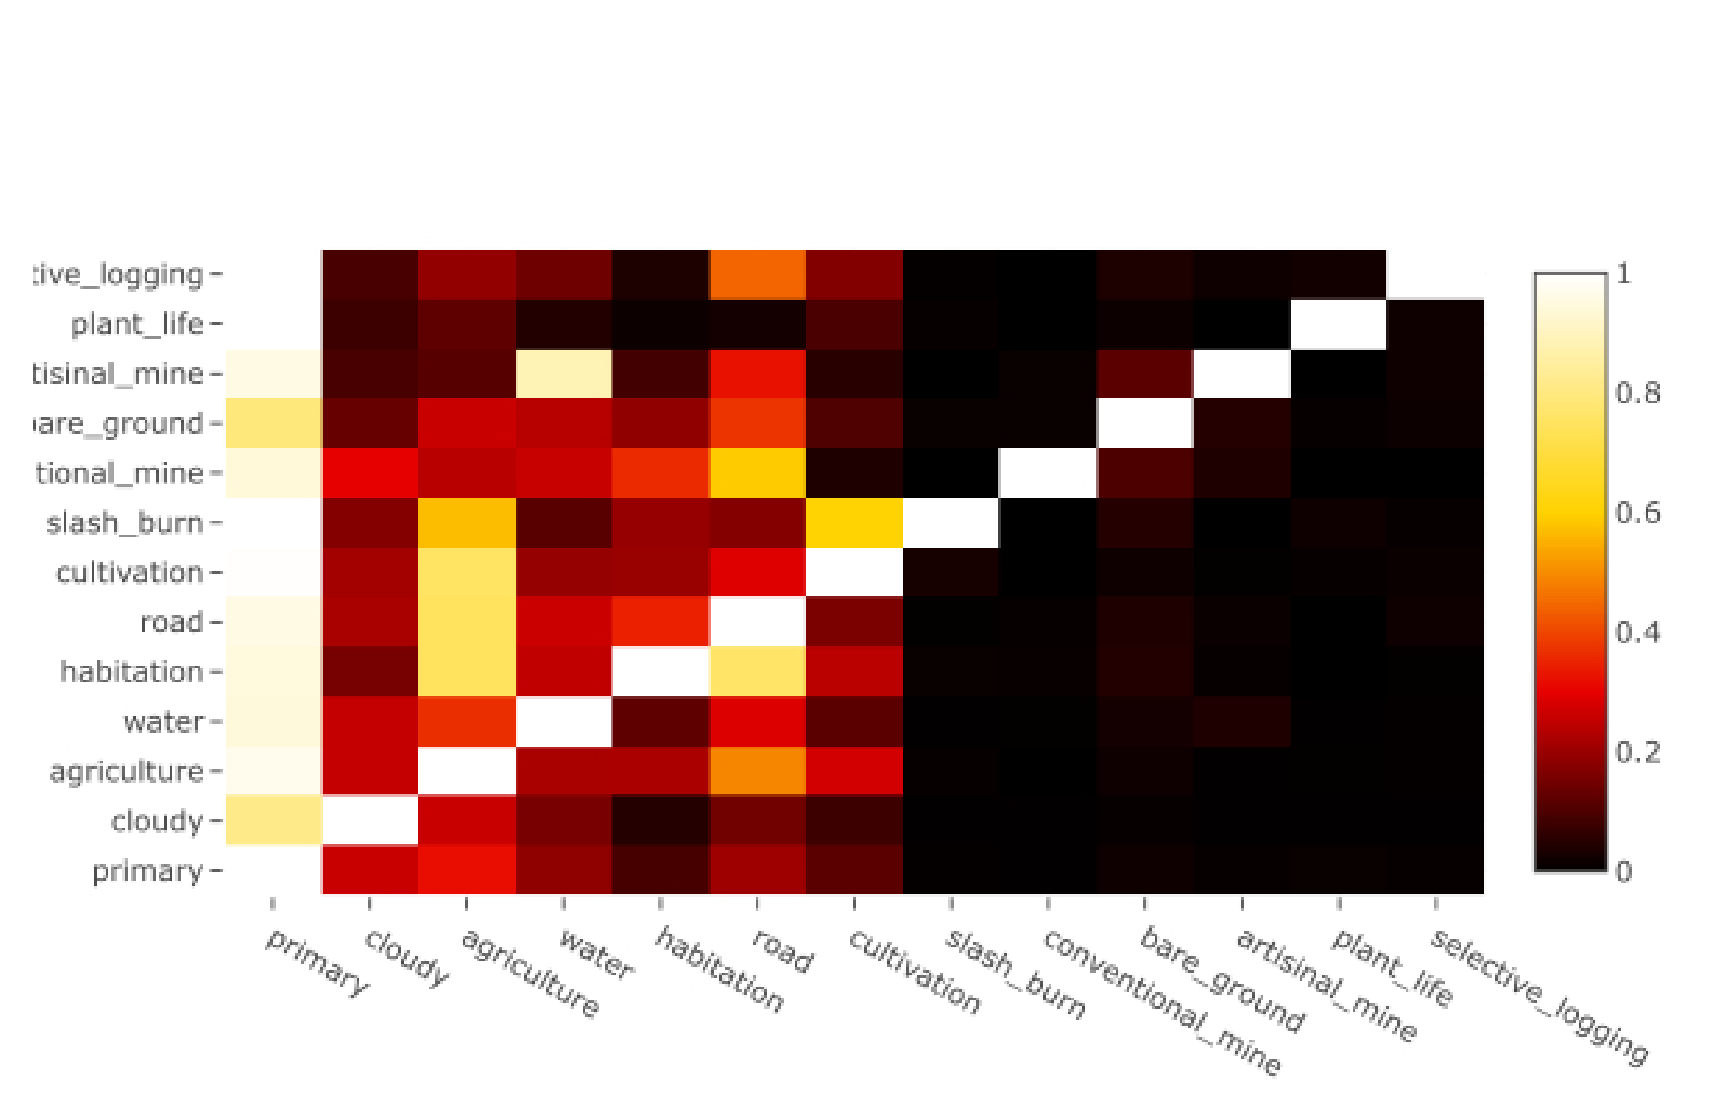

In [9]:
''' Generate Heatmap of Tag Correlations '''

com = np.zeros([len(counts)]*2) #coocurrence matrix
for i, key in enumerate(list(counts.keys())):
    for k, val in enumerate(list(counts.keys())):
        cx = 0
        cy = 0
        for row in processedData.tags:
            if key in row:
                cx += 1
                if val in row: cy += 1
        com[i, k] = cy / cx

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()), colorscale='Hot')]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')


ax = plt.subplots(figsize=(30, 30))
img = cv2.imread('plot_images/heatMap.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

'View Images From Training_Image Dataset with Processed Tags'

Text(0.5,1,'train_21 - primary road water')

Text(0.5,1,'train_22 - primary cloudy')

Text(0.5,1,'train_23 - agriculture primary road')

Text(0.5,1,'train_24 - conventional_mine primary cloudy')

Text(0.5,1,'train_25 - primary')

Text(0.5,1,'train_26 - cloudy')

Text(0.5,1,'train_27 - agriculture primary water cloudy')

Text(0.5,1,'train_28 - primary')

Text(0.5,1,'train_29 - primary cloudy')

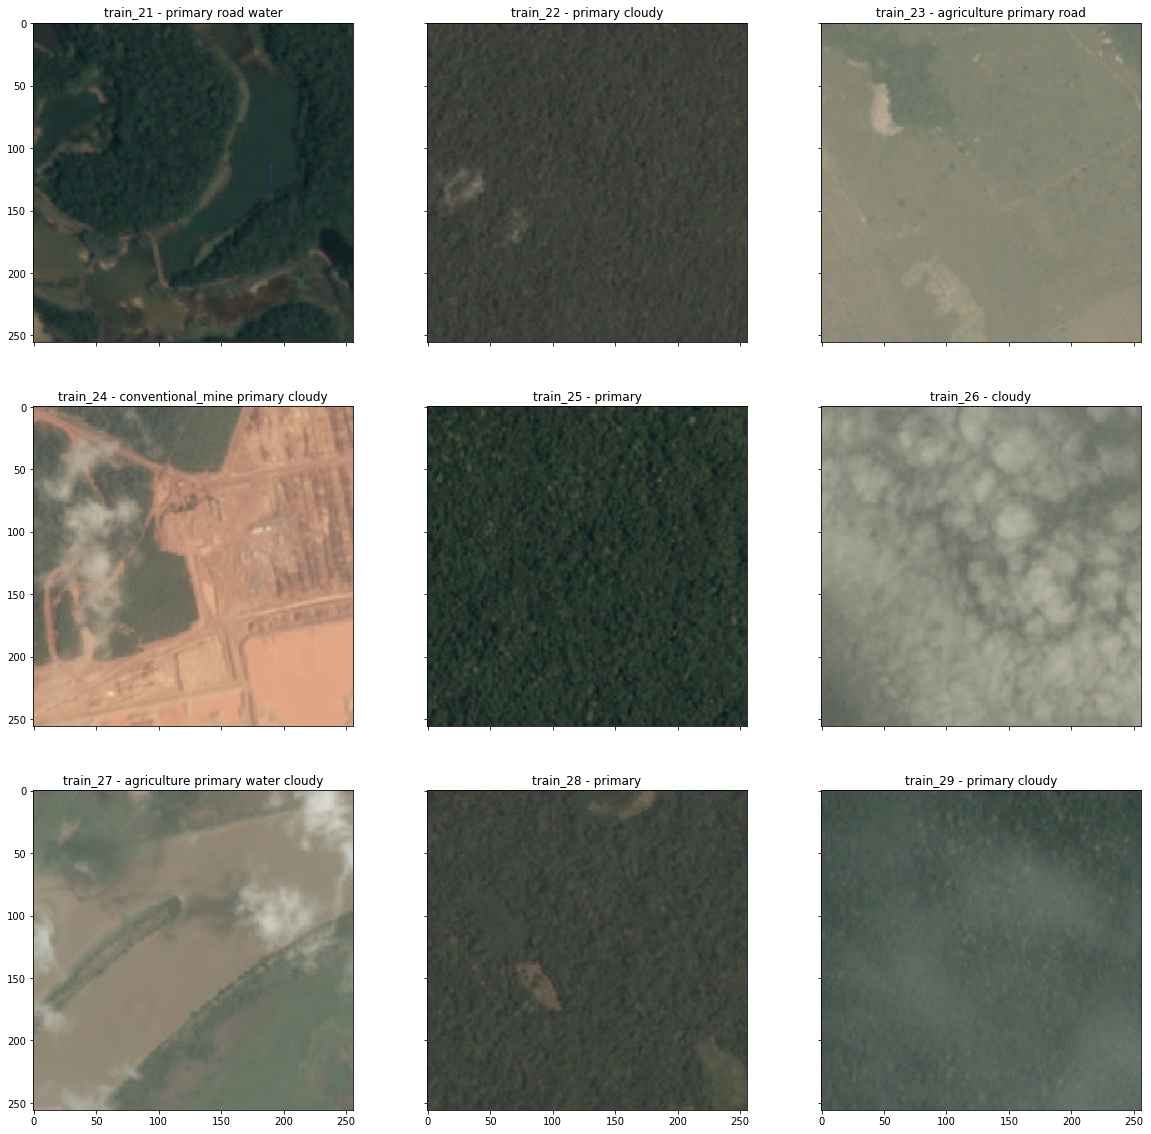

In [10]:
'''View Images From Training_Image Dataset with Processed Tags'''

processedData = pd.read_csv('procTrain_v2.csv')
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))
i = 0
for item, x in processedData[21:30].values:
    img = cv2.imread('train-jpg/{}.jpg'.format(item))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(item, x))
    i += 1
    
plt.show()